In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:


target_model = "20x5x5.0+mix+free"


# 解析文件内容
def parse_content(target_model):
    file = open(f"./makespan.txt", "r")
    lines = file.readlines()
    model_list = []
    makespans_data = []
    makespan_data = []
    for line in lines:
        # print(line)
        if line.startswith('./trained_network'):
            if makespan_data: makespans_data.append(np.array(makespan_data))
            makespan_data = []
            model_list.append(line)

        elif line.startswith('['):
            makespans = eval(line)
            makespan_data.append(makespans)

    makespans_data.append(np.array(makespan_data))
    
    model_list = [s.split("/")[-1] for s in model_list]        
    
    return model_list, makespans_data

model_list, makespan_data = parse_content(target_model)
# print(makespan_data)

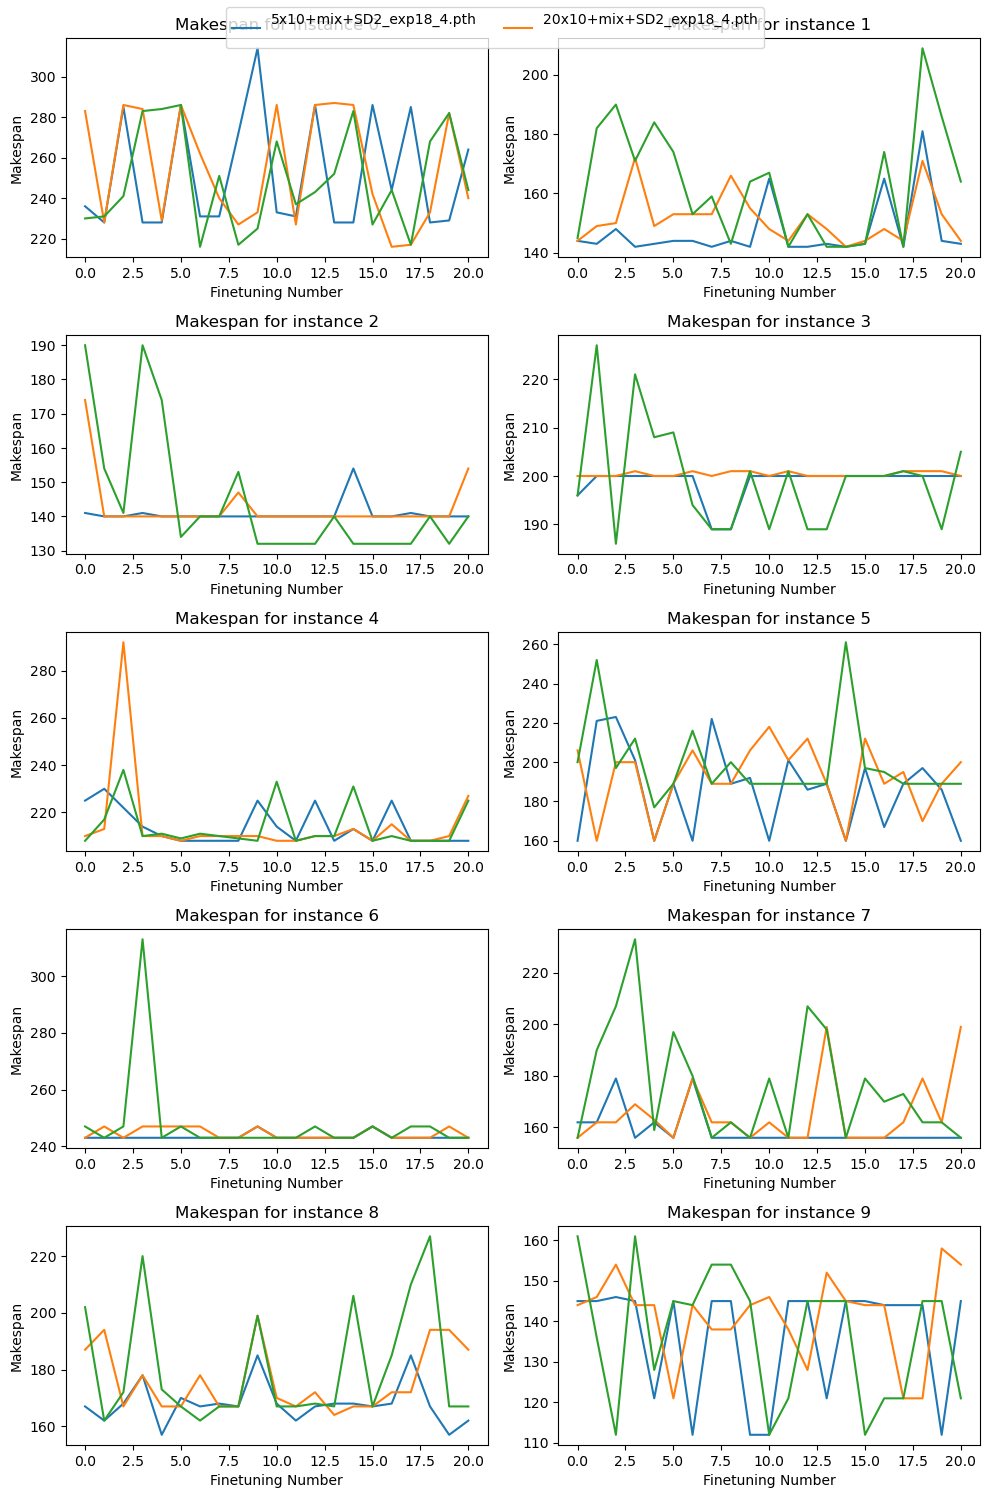

In [3]:
# 假设 makespan_data 是一个已经存在的数据结构
# model_list 是一个包含模型名称的列表

fig, axes = plt.subplots(5, 2, figsize=(10, 15))  # 创建 10x2 的子图网格
lines = []
for i in range(10):
    ax = axes[i // 2, i % 2]  # 定位当前子图
    for j in range(len(model_list)):
        line, = ax.plot(makespan_data[j][:, i], label=f'{model_list[j]}')
        if i == 0:
            lines.append(line)
    ax.set_title(f'Makespan for instance {i}')
    ax.set_xlabel('Finetuning Number')
    ax.set_ylabel('Makespan')
    # ax.legend()

# 在图形外部放置一个统一的图例
fig.legend(lines, [f'{model_list[j]}' for j in range(2)], loc='upper center', ncol=2)

plt.tight_layout()

plt.tight_layout()
plt.show()
